# ИССЛЕДОВАНИЕ ДАННЫХ HR-АГЕНТСТВА

## 1. Загрузка и обработка данных

In [120]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd

df = pd.read_csv('ds_salaries.csv')
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


### Проверка на наличие пропусков и дубликатов, а также на корректность типов данных столбцов

#### Проверка на наличие пропусков

In [121]:
df.info()   # общая информация о наборе данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [122]:
df.isnull().sum()   # дополнительная проверка на предмет пропусков

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

##### Выводы по проверке на наличие пропусков

Предварительная проверка показала, что в наборе данных содержится 607 записей, пропуски отсутствуют.

#### Проверка на дубликаты

In [123]:
dupl_columns = list(df.columns)
dupl_columns.remove('Unnamed: 0')   # список столбцов за вычетом неинформативного

mask = df.duplicated(subset=dupl_columns)
df_dup = df[mask]
print(f'Число найденных дубликатов: {df_dup.shape[0]}')

df.drop_duplicates(subset=dupl_columns, inplace=True, ignore_index=True)
print(f'Число записей без дубликатов: {df.shape[0]}')

Число найденных дубликатов: 42
Число записей без дубликатов: 565


##### Выводы по результатам проверки на дубликаты

Обнаружено 42 дубликата. После их удаления набор данных содержит 565 записей.

#### Определение неинформативных признаков

In [124]:
# данные в столбце 'Unnamed: 0' не несёт полезной информации. Столбцы 'salary' и 'salary_currency' фактически дублируются 
# признаком 'salary_in_usd' и потому являются избыточными.

df.drop(['Unnamed: 0', 'salary', 'salary_currency'], axis=1, inplace=True)

#### Кодирование признаков

In [125]:
# Следующие признаки целесообразно закодировать: experience_level, remote_ratio, company_size, employment_type
import category_encoders as ce

ord_encoder = ce.OrdinalEncoder(mapping=[
                                {'col': 'experience_level', 'mapping': {'EN': 1, 'MI': 2, 'SE': 3, 'EX': 4}},
                                {'col': 'remote_ratio', 'mapping': {0: 1, 50: 2, 100: 3}},
                                {'col': 'company_size', 'mapping': {'S': 1, 'M': 2, 'L': 3}}, 
                                {'col': 'employment_type', 'mapping': {'PT': 1, 'FT': 2, 'CT': 3, 'FL':4}}])

data_bin = ord_encoder.fit_transform(df[['experience_level', 'remote_ratio', 'company_size', 'employment_type']])
df_copy = df.copy()
df_copy.drop(['experience_level', 'remote_ratio', 'company_size', 'employment_type'], axis=1, inplace=True)
df_copy = pd.concat([df_copy, data_bin], axis=1)

df_copy

,work_year,job_title,salary_in_usd,employee_residence,company_location,experience_level,remote_ratio,company_size,employment_type
0,2020,Data Scientist,79833,DE,DE,2,1,3,2
1,2020,Machine Learning Scientist,260000,JP,JP,3,1,1,2
2,2020,Big Data Engineer,109024,GB,GB,3,2,2,2
3,2020,Product Data Analyst,20000,HN,HN,2,1,1,2
4,2020,Machine Learning Engineer,150000,US,US,3,2,3,2
...,...,...,...,...,...,...,...,...,...
560,2022,Data Engineer,154000,US,US,3,3,2,2
561,2022,Data Engineer,126000,US,US,3,3,2,2
562,2022,Data Analyst,129000,US,US,3,1,2,2
563,2022,Data Analyst,150000,US,US,3,3,2,2


#### Классификация признаков

Числовые признаки исходного набора данных без учёта удалённых: 

    'work_year', 'salary_in_usd', 'remote_ratio'
Категориальные признаки исходного набора данных без учёта удалённых: 

    'experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size'

Однако, признаки `'work_year'` и `'remote_ratio'` в контексте набора данных, формально являясь числовыми, скорее, по своей сути категориальные, нежели числовые.



In [126]:
# Основные статистические характеристики для числовых признаков исходного набора данных
print(f'Основные статистические характеристики для числовых признаков исходного набора данных {'\n'} {df.describe()}')
print()
# Основные статистические характеристики для числовых признаков обработанного набора данных
print(f'Основные статистические характеристики для числовых признаков обработанного набора данных {'\n'} {df_copy.describe()}')

Основные статистические характеристики для числовых признаков исходного набора данных 
          work_year  salary_in_usd  remote_ratio
count   565.000000     565.000000    565.000000
mean   2021.364602  110610.343363     69.911504
std       0.698138   72280.702792     40.900666
min    2020.000000    2859.000000      0.000000
25%    2021.000000   60757.000000     50.000000
50%    2021.000000  100000.000000    100.000000
75%    2022.000000  150000.000000    100.000000
max    2022.000000  600000.000000    100.000000

Основные статистические характеристики для числовых признаков обработанного набора данных 
          work_year  salary_in_usd  experience_level  remote_ratio  \
count   565.000000     565.000000        565.000000    565.000000   
mean   2021.364602  110610.343363          2.366372      2.398230   
std       0.698138   72280.702792          0.798004      0.818013   
min    2020.000000    2859.000000          1.000000      1.000000   
25%    2021.000000   60757.000000         

#### Проверка на корреляцию признаков

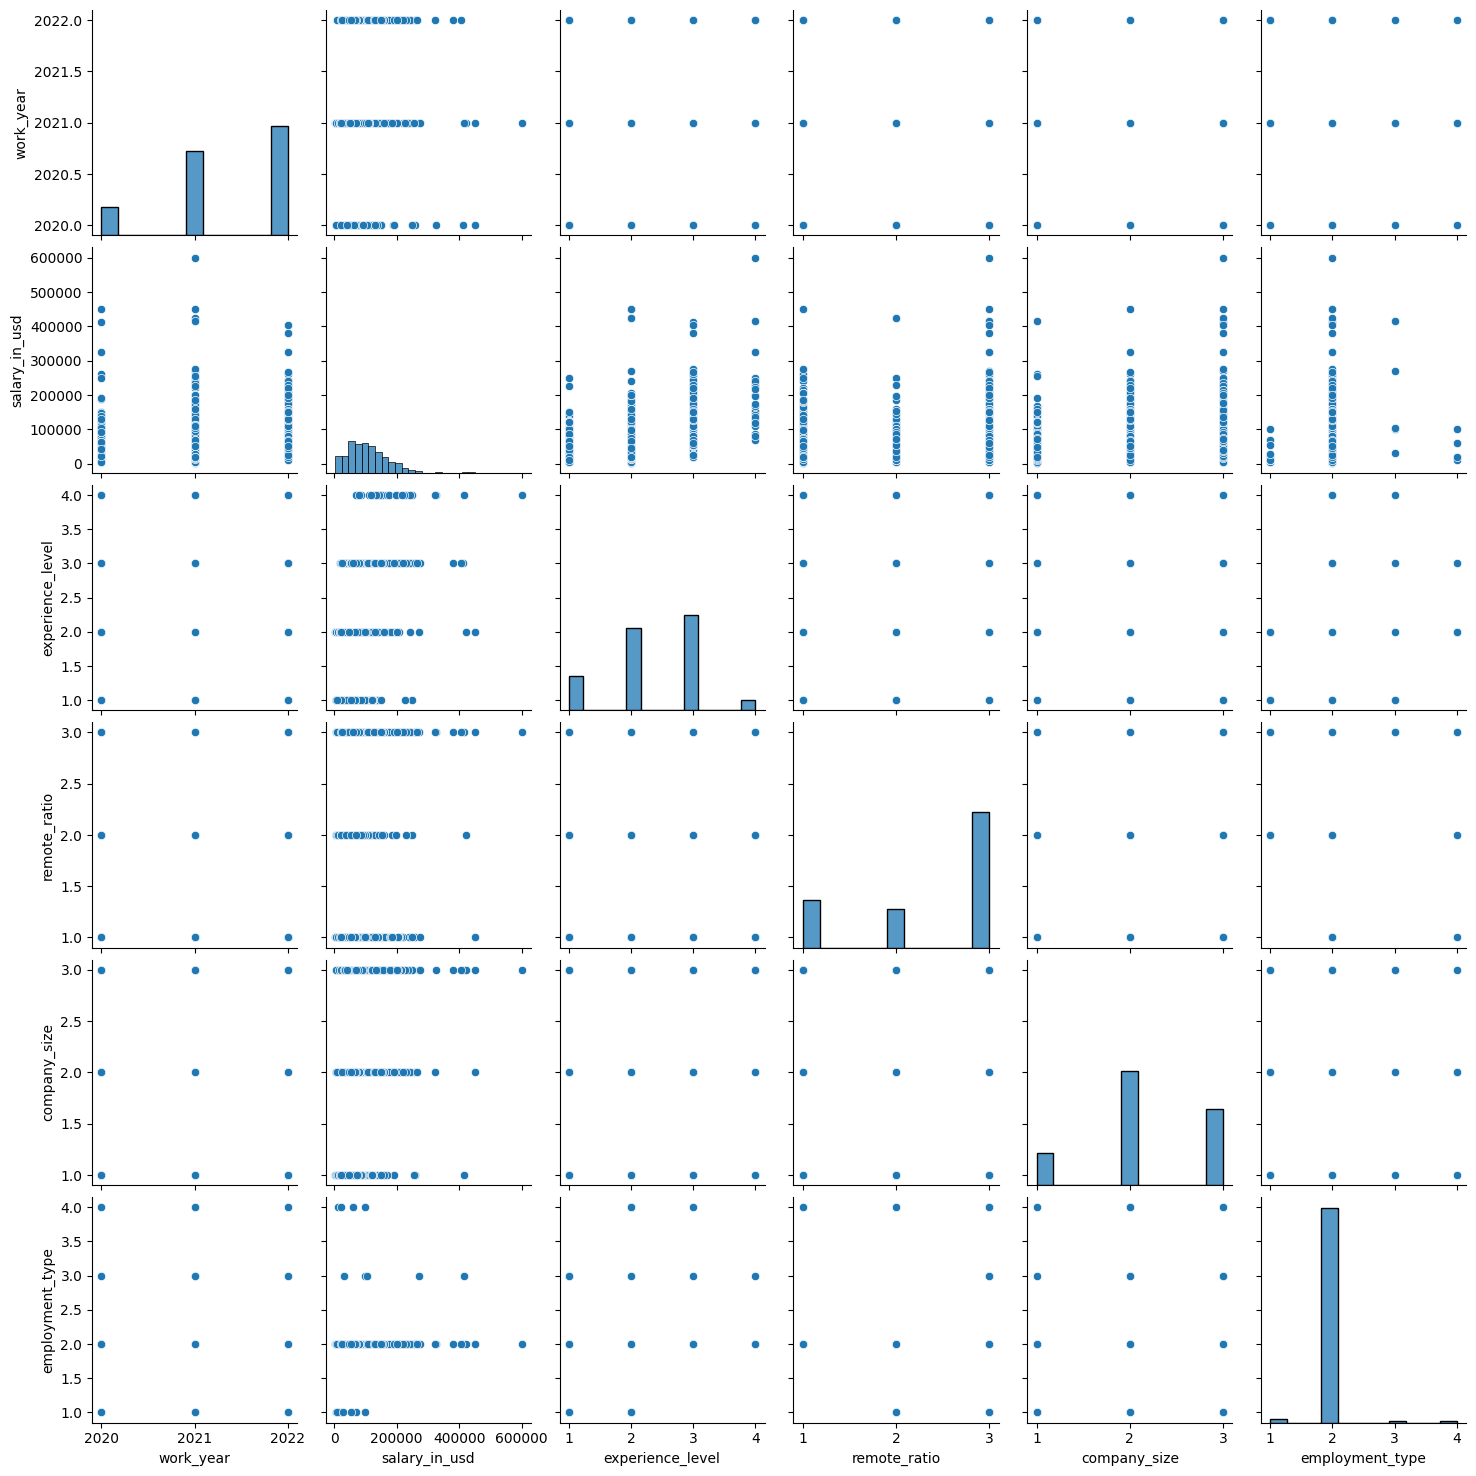

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df_copy)

<Axes: title={'center': 'Визуализация матрицы корреляции признаков'}>

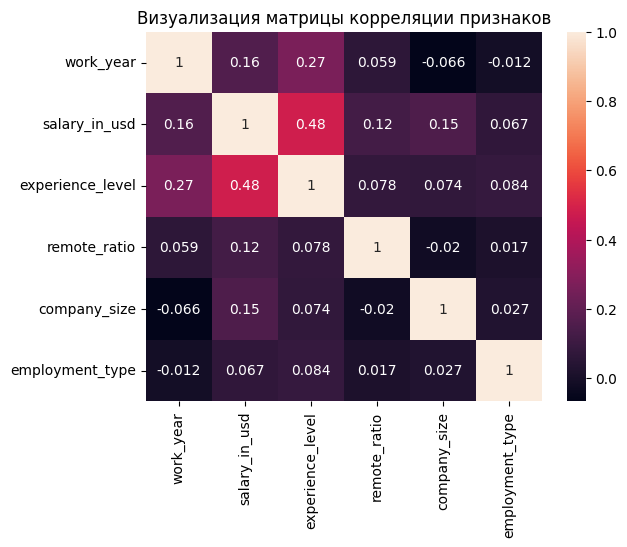

In [128]:
# определение корреляций признаков
df_corr = df_copy.corr(numeric_only=True)

# Визуализация корреляций признаков

ax = plt.axes()
ax.set_title('Визуализация матрицы корреляции признаков')
sns.heatmap(df_corr, annot=True)

Выводы по проверке на корреляцию признаков:

Проверка на корреляцию признаков показала, что в наборе данных отсутствуют мультиколлинеарные признаки, относительно которых следовало бы принять решение об удалении. Обращает на себя лишь слабая положительная корреляция между заработной платой и уровнем опыта. Все прочие признаки не оказывают заметного влияния на размер заработной платы.

## 2. Разведывательный анализ данных

### 2.1. Визуальный анализ данных
#### 'Год, в котором была выплачена зарплата' - work_year - визуализация

In [129]:
data = df.groupby('work_year')['salary_in_usd'].describe().round(2).sort_values(by='mean', ascending=False)
print('Заработная плата в зависимости от года выплаты зарплаты')
data

Заработная плата в зависимости от года выплаты зарплаты


,count,mean,std,min,25%,50%,75%,max
work_year,,,,,,,,
2022,278.0,123089.10,59888.93,10000.0,78791.0,120000.0,160000.0,405000.0
2021,215.0,99430.41,80304.32,2859.0,50000.0,82528.0,135000.0,600000.0
2020,72.0,95813.00,82831.80,5707.0,45724.5,75544.0,115526.0,450000.0


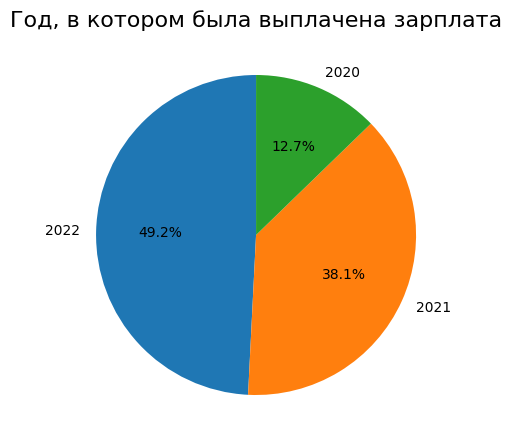

In [130]:
import plotly
import plotly.express as px

fig = plt.figure(figsize=(4, 4))
ax = fig.add_axes((1, 1, 1, 1))
df2 = df['work_year'].value_counts().sort_values(ascending=False)
pie = ax.pie(
    df2,
    labels=df2.index,
    autopct='%1.1f%%',
    startangle=90
)
title = ax.set_title('Год, в котором была выплачена зарплата', fontsize=16)

plt.show(pie)

In [131]:
df_year = df.groupby(by='work_year', as_index=False).salary_in_usd.mean().sort_values(by='salary_in_usd', ascending=False)
df_year.nlargest(10, columns='salary_in_usd')

fig = px.bar(data_frame=df_year, x='work_year', y='salary_in_usd', color='work_year', text = df_year.salary_in_usd, orientation='v', 
    height=500, width=500, title='Средняя заработная плата в зависимости от года выплаты зарплаты' 
)
fig.show()

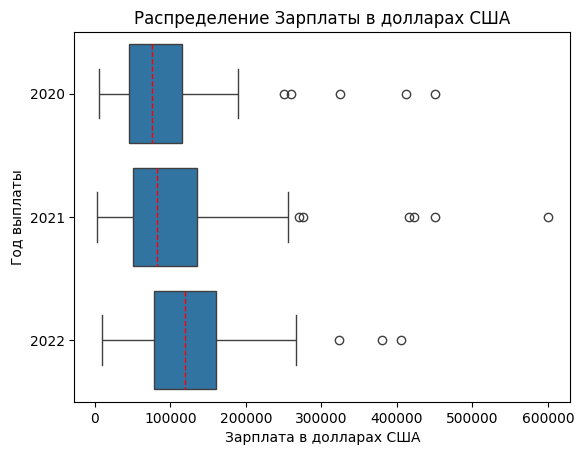

In [132]:

ax = sns.boxplot(df, x='salary_in_usd', y='work_year', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Зарплата в долларах США', ylabel='Год выплаты')
plt.title('Распределение Зарплаты в долларах США')
plt.show()

Наибольшая заработная платы выплачена в 2022 году. Наблюдается увеличение как медианы, так и верхней границы выплат за наблюдаемое время.

#### 'Зарплата в долларах США' - salary_in_usd - визуализация

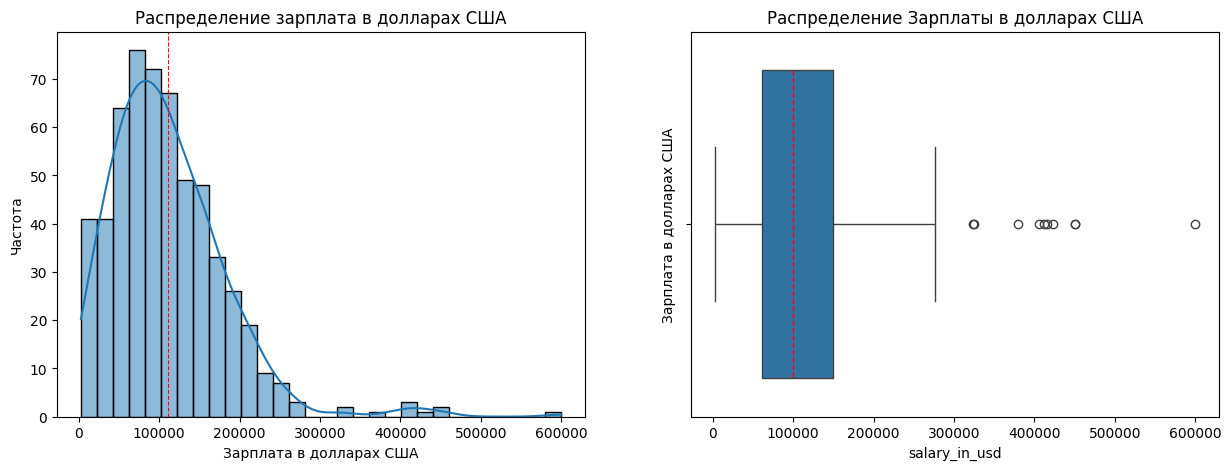

In [133]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(df_copy.salary_in_usd, bins=30, kde=True, ax=axes[0])
axes[0].set(xlabel='Зарплата в долларах США', ylabel='Частота')
axes[0].set_title('Распределение зарплата в долларах США')
axes[0].axvline(df_copy.salary_in_usd.mean(), color='red', linestyle='--', linewidth=0.8)

sns.boxplot(df_copy['salary_in_usd'], ax=axes[1], orient='h', medianprops={"color": "red", "linestyle": '--'})
axes[1].set(ylabel='Зарплата в долларах США')
axes[1].set_title('Распределение Зарплаты в долларах США')

plt.show()

Распределение зарплаты представляет из себя несиммметричное нормальное расределение

#### 'Общий объём работы, выполняемой удалённо' - remote_ratio - визуализация

In [134]:
data = df.groupby('remote_ratio')['salary_in_usd'].describe().round(2).sort_values(by='mean', ascending=False)
print('Заработная плата в зависимости от работ, выполняемых удалённо')
data

Заработная плата в зависимости от работ, выполняемых удалённо


,count,mean,std,min,25%,50%,75%,max
remote_ratio,,,,,,,,
100,346.0,120763.19,74930.43,4000.0,70000.0,110712.5,159750.00,600000.0
0,121.0,105785.40,68392.50,2859.0,62000.0,98158.0,136000.00,450000.0
50,98.0,80721.90,57639.10,5409.0,50000.5,68010.5,99925.75,423000.0


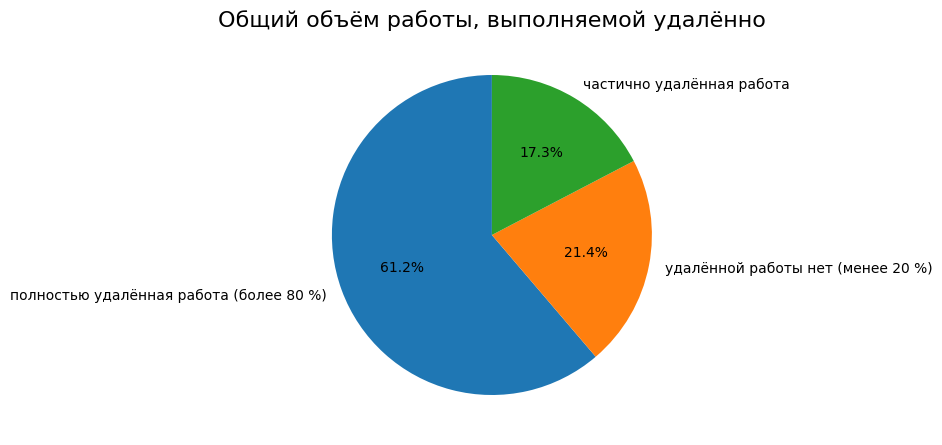

In [135]:
# Построение гистограммы для этого признака нецелесообразно

fig = plt.figure(figsize=(4, 4))
ax = fig.add_axes((1, 1, 1, 1))
df2 = df_copy.remote_ratio.value_counts().sort_values(ascending=False)

pie = ax.pie(
    df2,
    labels=['полностью удалённая работа (более 80 %)', 'удалённой работы нет (менее 20 %)', 'частично удалённая работа'],
    autopct='%1.1f%%',
    startangle=90
)
title = ax.set_title('Общий объём работы, выполняемой удалённо', fontsize=16)
plt.show(pie)

fig = px.bar(
    data_frame=df.groupby(by='remote_ratio', as_index=False)['remote_ratio'].value_counts().sort_values(by='count', ascending=False), 
    x="remote_ratio",
    y="count", 
    color='remote_ratio',
    text = df_copy['remote_ratio'].value_counts(), 
    orientation='v', 
    height=500,
    width=520, 
    title='Общий объём работы, выполняемой удалённо' 
)
fig.show()

In [136]:
# Средняя заработная плата в зависимости от remote_ratio

df_ratio = df.groupby(by='remote_ratio', as_index=False).salary_in_usd.mean().sort_values(by='salary_in_usd', ascending=False)
df_ratio.nlargest(10, columns='salary_in_usd')

fig = px.bar(data_frame=df_ratio, x='remote_ratio', y='salary_in_usd', color='remote_ratio', text = df_year.salary_in_usd, orientation='v', 
    height=500, width=500, title='Средняя заработная плата в зависимости от remote_ratio' 
)
fig.show()

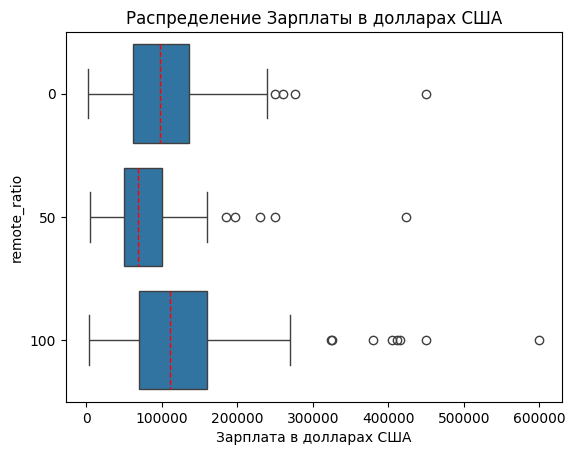

In [177]:
ax = sns.boxplot(df, x='salary_in_usd', y='remote_ratio', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Зарплата в долларах США', ylabel='remote_ratio')
plt.title('Распределение Зарплаты в долларах США')
plt.show()

Средняя заработная плата наибольшая для полностью удалённой работы и наименьшая в случае отсутствия удалённой работы.

#### 'Опыт работы на этой должности' - experience_level - визуализация

In [138]:
data = df.groupby('experience_level')['salary_in_usd'].describe().round(2).sort_values(by='mean', ascending=False)
print('Заработная плата в зависимости от опыта работы')
data

Заработная плата в зависимости от опыта работы


,count,mean,std,min,25%,50%,75%,max
experience_level,,,,,,,,
EX,26.0,199392.04,117071.26,69741.0,130006.50,171437.5,233750.00,600000.0
SE,243.0,138374.88,59955.97,18907.0,99531.50,135000.0,171881.00,412000.0
MI,208.0,87793.00,64118.97,2859.0,47163.75,76940.0,112075.00,450000.0
EN,88.0,61643.32,44395.54,4000.0,27505.00,56500.0,85425.75,250000.0


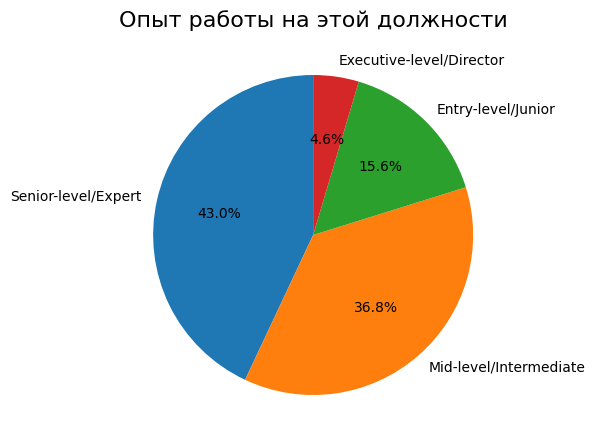

In [139]:
# Построение гистограммы для этого признака нецелесообразно
fig = plt.figure(figsize=(4, 4))
ax = fig.add_axes((1, 1, 1, 1))
df2 = df_copy.experience_level.value_counts().sort_values(ascending=False)

pie = ax.pie(
    df2,
    labels=['Senior-level/Expert', 'Mid-level/Intermediate', 'Entry-level/Junior', 'Executive-level/Director'],
    autopct='%1.1f%%',
    startangle=90
)
title = ax.set_title('Опыт работы на этой должности', fontsize=16)
plt.show(pie)

fig = px.bar(
    data_frame=df.groupby(by='experience_level', as_index=False)['experience_level'].value_counts().sort_values(by='count', ascending=False), 
    x="experience_level",
    y="count", 
    color='experience_level',
    text = df_copy['experience_level'].value_counts(), 
    orientation='v', 
    height=500,
    width=520, 
    title='Опыт работы на этой должности' 
)
fig.show()

In [140]:
# Средняя заработная плата в зависимости от опыта работы на этой должности

df_exp = df.groupby(by='experience_level', as_index=False).salary_in_usd.mean().sort_values(by='salary_in_usd', ascending=False)
df_exp.nlargest(10, columns='salary_in_usd')

fig = px.bar(data_frame=df_exp, x='experience_level', y='salary_in_usd', color='experience_level', text = df_exp.salary_in_usd, orientation='v', 
    height=500, width=500, title='Средняя заработная плата в зависимости от опыта работы на этой должности' 
)
fig.show()

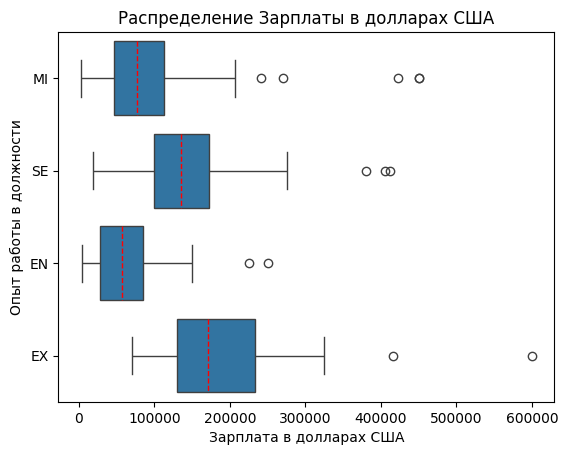

In [141]:
ax = sns.boxplot(df, x='salary_in_usd', y='experience_level', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Зарплата в долларах США', ylabel='Опыт работы в должности')
plt.title('Распределение Зарплаты в долларах США')
plt.show()

Распределение заработной платы в зависимости от опыта работы на должности в следующее в порядке уменьшения: Executive-level/Director, Senior-level/Expert, Mid-level/Intermediate, Entry-level/Junior

#### 'Роль, в которой соискатель работал в течение года' - job_title - визуализация

In [142]:
data = df.groupby('job_title')['salary_in_usd'].describe().round(2).sort_values(by='mean', ascending=False)
print('Заработная плата в зависимости от роли')
data

Заработная плата в зависимости от роли


,count,mean,std,min,25%,50%,75%,max
job_title,,,,,,,,
Data Analytics Lead,1.0,405000.00,NaN,405000.0,405000.00,405000.0,405000.00,405000.0
Principal Data Engineer,3.0,328333.33,235389.75,185000.0,192500.00,200000.0,400000.00,600000.0
Financial Data Analyst,2.0,275000.00,247487.37,100000.0,187500.00,275000.0,362500.00,450000.0
Principal Data Scientist,7.0,215242.43,94705.04,148261.0,156837.00,173762.0,227500.00,416000.0
Director of Data Science,7.0,195074.00,70015.79,130026.0,147756.50,168000.0,223489.50,325000.0
Data Architect,11.0,177873.91,45714.72,90700.0,148900.00,180000.0,200669.50,266400.0
Applied Data Scientist,5.0,175655.00,123647.19,54238.0,110037.00,157000.0,177000.00,380000.0
Analytics Engineer,4.0,175000.00,29508.08,135000.0,165000.00,179850.0,189850.00,205300.0
Data Specialist,1.0,165000.00,NaN,165000.0,165000.00,165000.0,165000.00,165000.0


In [143]:
fig = px.bar(
    data_frame=df.groupby(by='job_title', as_index=False)['job_title'].value_counts().sort_values(by='count', ascending=False), 
    y="job_title",
    x="count", 
    color='job_title',
    text = df_copy['job_title'].value_counts(), 
    orientation='h', 
    height=1000,
    width=1200, 
    title='Роль, в которой соискатель работал в течение года' 
)

fig.show()

In [144]:
# Зависимость средней заработной платы от роли, в которой соискатель работал в течение года

df_title = df.groupby(by='job_title', as_index=False).salary_in_usd.mean().sort_values(by='salary_in_usd', ascending=False)
df_title.nlargest(10, columns='salary_in_usd')

fig = px.bar(data_frame=df_title, x='job_title', y='salary_in_usd', color='job_title', text = df_title.salary_in_usd, orientation='v', 
    height=500, width=1000, title='Зависимость средней заработной платы от роли, в которой соискатель работал в течение года' 
)
fig.show()

Вышеприведённый график показывает распределение средней заработной платы в зависимости от занимаемой должности. Наибольшие значения у руководящих специалистов и специалистов имеющих отношение к фининсам.

#### 'Тип трудоустройства для этой роли' - employment_type - визуализация

In [145]:
data = df.groupby('employment_type')['salary_in_usd'].describe().round(2).sort_values(by='mean', ascending=False)
print('Заработная плата в зависимости от типа трудоустройства')
data

Заработная плата в зависимости от типа трудоустройства


,count,mean,std,min,25%,50%,75%,max
employment_type,,,,,,,,
CT,5.0,184575.00,156250.89,31875.0,100000.0,105000.0,270000.0,416000.0
FT,546.0,111811.84,70790.70,2859.0,62726.0,100000.0,150000.0,600000.0
FL,4.0,48000.00,40529.82,12000.0,18000.0,40000.0,70000.0,100000.0
PT,10.0,33070.50,31472.91,5409.0,12000.0,18817.5,48370.0,100000.0


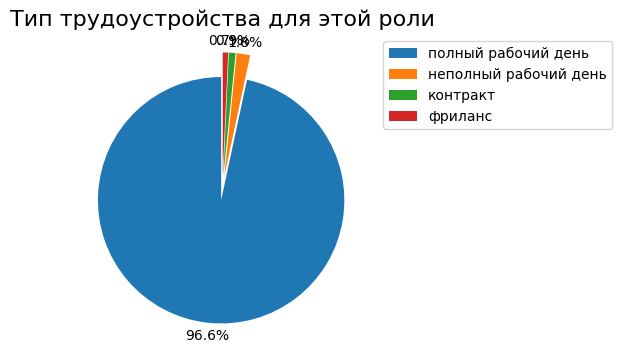

In [146]:
fig, ax = plt.subplots(figsize=(4, 4), subplot_kw=dict(aspect="equal"))
df2 = df_copy.employment_type.value_counts().sort_values(ascending=False)

explode = (0.1, 0.1, 0.1, 0.1)
labels=['полный рабочий день', 'неполный рабочий день', 'контракт', 'фриланс']
ax.pie(df2, autopct='%1.1f%%', explode=explode, startangle=90, pctdistance=1.1)
title = ax.set_title('Тип трудоустройства для этой роли', fontsize=16)

ax.legend(labels, loc='best', bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

fig = px.bar(
    data_frame=df.groupby(by='employment_type', as_index=False)['employment_type'].value_counts().sort_values(by='count', ascending=False), 
    x="employment_type",
    y="count", 
    color='employment_type',
    text = df_copy['employment_type'].value_counts(), 
    orientation='v', 
    height=500,
    width=520, 
    title='Тип трудоустройства' 
)
fig.show()

In [147]:
# Средняя заработная плата в зависимости от типа занятости

df_emp = df.groupby(by='employment_type', as_index=False).salary_in_usd.mean().sort_values(by='salary_in_usd', ascending=False)
df_emp.nlargest(10, columns='salary_in_usd')

fig = px.bar(data_frame=df_emp, x='employment_type', y='salary_in_usd', color='employment_type', text = df_emp.salary_in_usd, orientation='v', 
    height=500, width=600, title='Средняя заработная плата в зависимости от типа занятости' 
)
fig.show()

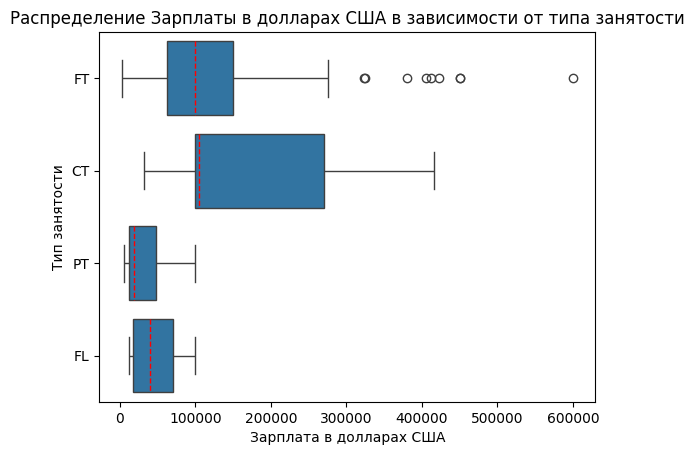

In [148]:
ax = sns.boxplot(df, x='salary_in_usd', y='employment_type', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Зарплата в долларах США', ylabel='Тип занятости')
plt.title('Распределение Зарплаты в долларах США в зависимости от типа занятости')
plt.show()

Распределение заработной платы в зависимости от типа занятости следующее в порядке убывания: контракт, полный рабочий день, фриланс, неполный рабочий день.

#### Основная страна проживания - employee_residence - визуализация

In [149]:
data = df.groupby('employee_residence')['salary_in_usd'].describe().round(2).sort_values(by='mean', ascending=False)
print('Заработная плата в зависимости от страны проживания')
data

Заработная плата в зависимости от страны проживания


,count,mean,std,min,25%,50%,75%,max
employee_residence,,,,,,,,
MY,1.0,200000.00,NaN,200000.0,200000.00,200000.0,200000.00,200000.0
PR,1.0,160000.00,NaN,160000.0,160000.00,160000.0,160000.00,160000.0
US,295.0,150094.92,70918.56,25000.0,105200.00,138000.0,175550.00,600000.0
NZ,1.0,125000.00,NaN,125000.0,125000.00,125000.0,125000.00,125000.0
CH,1.0,122346.00,NaN,122346.0,122346.00,122346.0,122346.00,122346.0
AU,3.0,108042.67,36337.91,86703.0,87064.00,87425.0,118712.50,150000.0
RU,4.0,105750.00,84255.07,48000.0,57000.00,72500.0,121250.00,230000.0
SG,2.0,104176.50,21047.03,89294.0,96735.25,104176.5,111617.75,119059.0
JP,7.0,103537.71,81283.30,40000.0,52700.00,74000.0,122682.00,260000.0


In [150]:
fig = px.bar(
    data_frame=df_copy.groupby(by='employee_residence', as_index=False)['employee_residence'].value_counts().sort_values(by='count', 
                                                                                                                         ascending=False), 
    y="employee_residence",
    x="count", 
    color='employee_residence',
    text = df_copy['employee_residence'].value_counts(), 
    orientation='h', 
    height=1000,
    width=1200, 
    title='Основная страна проживания' #заголовок
)

fig.show()

In [178]:
# Средняя заработная плата в зависимости от основной страны проживания сотрудника

df_country = df.groupby(by='employee_residence', as_index=False).salary_in_usd.mean().sort_values(by='salary_in_usd', ascending=False)
df_country.nlargest(10, columns='salary_in_usd')

fig = px.bar(data_frame=df_country, x='employee_residence', y='salary_in_usd', color='employee_residence', 
             text = df_country.salary_in_usd, orientation='v', 
    height=500, width=1000, title='Средняя заработная плата в зависимости от основной страны проживания сотрудника' 
)
fig.show()

Максимальная заработная плата в следующих странах проживания: Малайзия, Пуэрто-Рико, США, Новая Зеландия, Швейцария

#### Страна главного офиса работодателя или филиала по контракту - company_location - визуализация 

In [152]:
data = df.groupby('company_location')['salary_in_usd'].describe().round(2).sort_values(by='mean', ascending=False)
print('Заработная плата в зависимости от размера компании')
data

Заработная плата в зависимости от размера компании


,count,mean,std,min,25%,50%,75%,max
company_location,,,,,,,,
RU,2.0,157500.00,102530.48,85000.0,121250.00,157500.0,193750.00,230000.0
US,318.0,144292.99,72524.34,5679.0,100000.00,135000.0,173000.00,600000.0
NZ,1.0,125000.00,NaN,125000.0,125000.00,125000.0,125000.00,125000.0
IL,1.0,119059.00,NaN,119059.0,119059.00,119059.0,119059.00,119059.0
JP,6.0,114127.33,83584.64,41689.0,66283.25,75682.0,145341.00,260000.0
AU,3.0,108042.67,36337.91,86703.0,87064.00,87425.0,118712.50,150000.0
CA,28.0,100121.86,47080.71,52000.0,70518.00,81895.5,117374.75,225000.0
AE,3.0,100000.00,30413.81,65000.0,90000.00,115000.0,117500.00,120000.0
DZ,1.0,100000.00,NaN,100000.0,100000.00,100000.0,100000.00,100000.0


In [153]:
bar_data = df_copy.groupby(
    by='company_location',
    as_index=False
)['company_location'].value_counts().sort_values(by='count', ascending=False)

fig = px.bar(
    data_frame=bar_data, 
    y="company_location",
    x="count", 
    color='company_location',
    text = df_copy['company_location'].value_counts(), 
    orientation='h', 
    height=1000,
    width=1200, 
    title='Страна главного офиса работодателя или филиала по контракту' #заголовок
)

fig.show()

In [154]:
# Средняя заработная плата в зависимости от страны главного офиса работодателя

df_location = df.groupby(by='company_location', as_index=False).salary_in_usd.mean().sort_values(by='salary_in_usd', ascending=False)
df_location.nlargest(10, columns='salary_in_usd')

fig = px.bar(data_frame=df_location, x='company_location', y='salary_in_usd', color='company_location', text = df_location.salary_in_usd, orientation='v', 
    height=500, width=1000, title='Средняя заработная плата в зависимости от страны главного офиса работодателя' 
)
fig.show()

Максимальная заработная плата в следующих странах главного офиса работодателя: Россия, США, Малайзия, Новая Зеландия, Япония

#### Среднее количество людей, работавших в компании в течение года - company_size - визуализация

In [155]:
data = df.groupby('company_size')['salary_in_usd'].describe().round(2)
print('Заработная плата в зависимости от размера компании')
data

Заработная плата в зависимости от размера компании


,count,mean,std,min,25%,50%,75%,max
company_size,,,,,,,,
L,193.0,118213.88,86753.27,5882.0,60000.0,100000.0,153667.00,600000.0
M,290.0,114807.08,60779.04,4000.0,70821.5,109640.0,150213.75,450000.0
S,82.0,77872.10,63814.52,2859.0,41816.0,65511.0,100000.00,416000.0


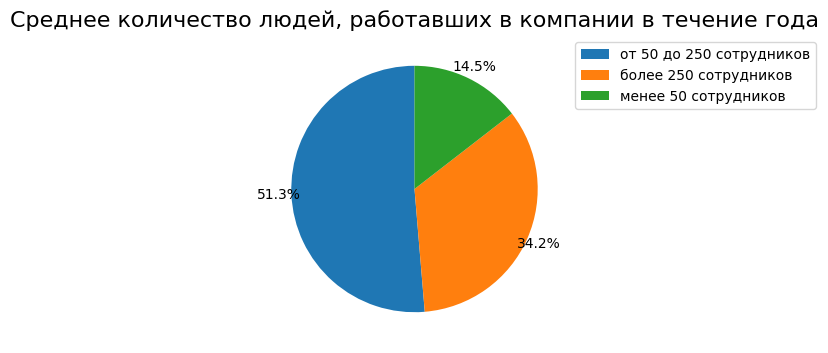

In [156]:
fig, ax = plt.subplots(figsize=(4, 4), subplot_kw=dict(aspect="equal"))
df2 = df_copy.company_size.value_counts().sort_values(ascending=False)

labels=['от 50 до 250 сотрудников', 'более 250 сотрудников', 'менее 50 сотрудников']
ax.pie(df2, autopct='%1.1f%%', startangle=90, pctdistance=1.1)
title = ax.set_title('Среднее количество людей, работавших в компании в течение года', fontsize=16)

ax.legend(labels, loc='best', bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()


fig = px.bar(
    data_frame=df.groupby(by='company_size', as_index=False)['company_size'].value_counts().sort_values(by='count', ascending=False), 
    x="company_size",
    y="count", 
    color='company_size',
    text = df_copy['company_size'].value_counts(), 
    orientation='v', 
    height=400,
    width=520, 
    title='Среднее количество людей, работавших в компании' 
)
fig.show()

In [157]:
# Средняя заработная плата в зависимости от размера компании

df_size = df.groupby(by='company_size', as_index=False).salary_in_usd.mean().sort_values(by='salary_in_usd', ascending=False)
df_size.nlargest(10, columns='salary_in_usd')

fig = px.bar(data_frame=df_size, x='company_size', y='salary_in_usd', color='company_size', text = df_size.salary_in_usd, orientation='v', 
    height=500, width=500, title='Средняя заработная плата в зависимости от размера компании' 
)
fig.show()

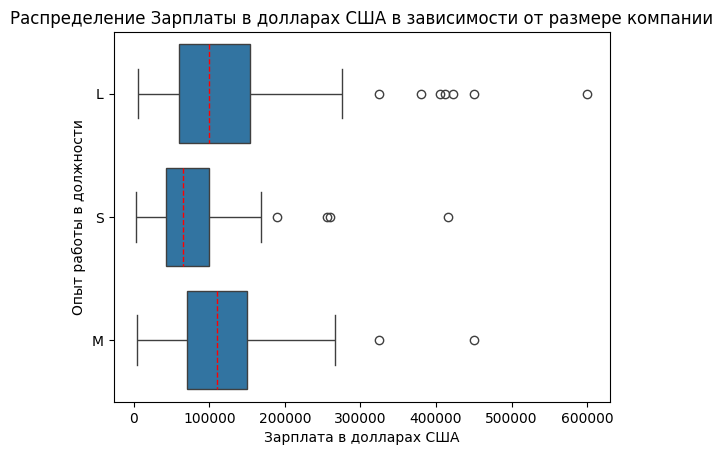

In [158]:
ax = sns.boxplot(df, x='salary_in_usd', y='company_size', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Зарплата в долларах США', ylabel='Опыт работы в должности')
plt.title('Распределение Зарплаты в долларах США в зависимости от размере компании')
plt.show()

Наибольшая заработная плата в крупных компаниях, наименьшая - в небольших компаниях. Заработная плата в средних компаниях незначительно отличается от заработной платы в крупных компаниях в меньшую сторону.

### Выводы о влиянии факторов на размер заработной платы

На основании визуального анализа обнаружены следующие факторы, влияющие на заработную плату:

Наибольшая заработная платы выплачена в 2022 году;

Распределение заработной платы в зависимости от опыта работы на должности в следующее в порядке уменьшения: Executive-level/Director, Senior-level/Expert, Mid-level/Intermediate, Entry-level/Junior;

Средняя заработная плата наибольшая для полностью удалённой работы и наименьшая в случае отсутствия удалённой работы;

Наибольший размер средней заработной платы у руководящих специалистов и специалистов имеющих отношение к фининсам;

Распределение средней заработной платы в зависимости от типа занятости следующее в порядке убывания: контракт, полный рабочий день, фриланс, неполный рабочий день;

Максимальная среднаяя заработная плата в следующих странах проживания: Малайзия, Пуэрто-Рико, США, Новая Зеландия, Швейцария;

Максимальная средняя заработная плата в следующих странах главного офиса работодателя: Россия, США, Малайзия, Новая Зеландия, Япония;

Наибольшая средняя заработная плата в крупных компаниях, наименьшая - в небольших компаниях. Заработная плата в средних компаниях незначительно отличается от заработной платы в крупных компаниях в меньшую сторону.


### 2.2. Статистический анализ данных

In [159]:
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels import stats as sms

In [160]:
# уровень значимости
alpha = 0.05 
print("Уровень значимости alpha = {:.2f}".format(alpha))

Уровень значимости alpha = 0.05


#### Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?

**Нулевая и альтернативная гипотезы**

*Нулевая гипотеза* ($H_0$): ежегодного роста зарплат у специалистов Data Scientist ($μ_1$) нет ($μ_2$).

$$ H_0 : μ_1 <= μ_2$$

*Альтернативная гипотеза* ($H_1$): каждый год размер зарплат у специалистов Data Scientist ($μ_1$) увеличивается ($μ_2$).

$$ H_1 : μ_1 > μ_2$$

**Проверка на нормальность**

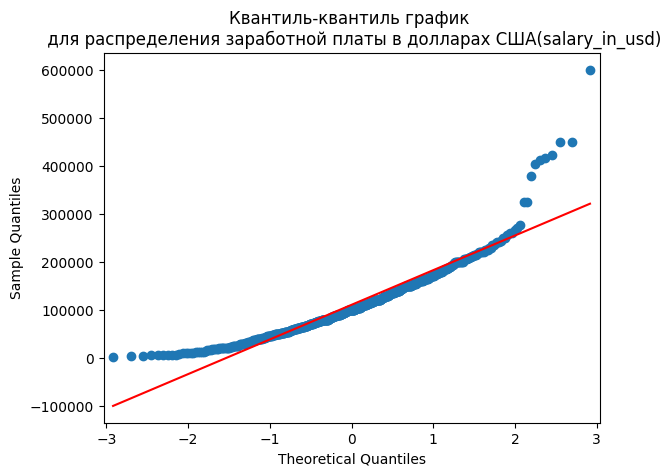

In [161]:
import numpy as np
import statsmodels.api as sm

# параметры квантиль-квантиль графика
sm.qqplot(df.salary_in_usd, line='s')
plt.title('Квантиль-квантиль график \n для распределения заработной платы в долларах США(salary_in_usd)')

plt.show()

Квантиль график показывает, что распределение зарплаты отлично от нормального.

Также воспользуемся тестом Шапиро-Уилка:

*Нулевая гипотеза для проверки на нормальность распределения* ($H_0$): распределение данные является нормальным.

*Альтернативная гипотеза для проверки на нормальность распределения* ($H_1$): распределение данных отлично от нормального.

In [162]:
# тест Шапиро-Уилка
print('Результат теста:')
result = stats.shapiro(df.salary_in_usd.values)

# функция для принятия решения о нормальности
def decision_normality(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Распределение отлично от нормального'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. Распределение является нормальным'.format(alpha))

decision_normality(result[1])


Результат теста:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


Поскольку признак salary_in_usd количественный, имеются три независимые сравниваемых группы (2020, 2021, 2022) и отличное от нормального распределение, необходимо выбрать тест Краскела-Уоллеса. 

In [163]:
import scipy.stats as stats

# формируем данные
d2020 = df.salary_in_usd[df.work_year == 2020]
d2021 = df.salary_in_usd[df.work_year == 2021]
d2022 = df.salary_in_usd[df.work_year == 2022]
# тест
_, p = stats.kruskal(d2020, d2021, d2022)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))


p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


##### **Вывод**

Анализ показал, что каждый год размер зарплат у специалистов Data Scientist увеличивается


#### Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?

**Проверка на нормальность**

Тест Шапиро-Уилка:

*Нулевая гипотеза для проверки на нормальность распределения* ($H_0$): распределение данные является нормальным.

*Альтернативная гипотеза для проверки на нормальность распределения* ($H_1$): распределение данных отлично от нормального.

In [164]:
# Формирование данных
df_scien = df[(df.work_year == 2022) & (df.job_title == 'Data Scientist')]
df_engin = df[(df.work_year == 2022) & (df.job_title == 'Data Engineer')]

# тест Шапиро-Уилка
print('Результат теста для Data Scientist:')
result = stats.shapiro(df_scien.salary_in_usd.values)
decision_normality(result[1])
print()
print('Результат теста для Data Engineer:')
result = stats.shapiro(df_engin.salary_in_usd.values)
decision_normality(result[1])

Результат теста для Data Scientist:
p-value = 0.676
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным

Результат теста для Data Engineer:
p-value = 0.007
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


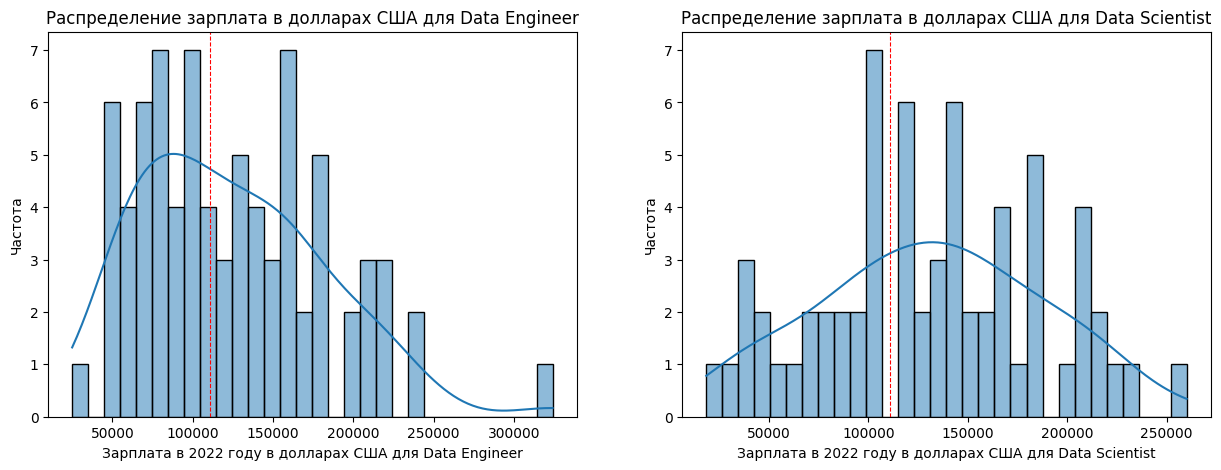

In [165]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(df_engin.salary_in_usd, bins=30, kde=True, ax=axes[0])
axes[0].set(xlabel='Зарплата в 2022 году в долларах США для Data Engineer', ylabel='Частота')
axes[0].set_title('Распределение зарплата в долларах США для Data Engineer')
axes[0].axvline(df_copy.salary_in_usd.mean(), color='red', linestyle='--', linewidth=0.8)

sns.histplot(df_scien.salary_in_usd, bins=30, kde=True, ax=axes[1])
axes[1].set(xlabel='Зарплата в 2022 году в долларах США для Data Scientist', ylabel='Частота')
axes[1].set_title('Распределение зарплата в долларах США для Data Scientist')
axes[1].axvline(df_copy.salary_in_usd.mean(), color='red', linestyle='--', linewidth=0.8)
plt.show()

Имеем две независимые группы с количественным признаком. Поскольку признак для Data Engineer не соответствует критерию нормального распределения, а для Data Scientist соответствует, но визуальный анализ показывает, что это нормальное распределение весьма условно, для статистического теста целесообразно выбрать U-критерий Манна-Уитни.

**Нулевая и альтернативная гипотезы**

*Нулевая гипотеза* ($H_0$):  зарплаты у Data Scientist ($μ_1$) и Data Engineer ($μ_2$) в 2022 году равны.

$$ H_0 : μ_1 = μ_2$$

*Альтернативная гипотеза* ($H_1$): зарплаты у Data Scientist ($μ_1$) и Data Engineer ($μ_2$) в 2022 году отличаются.

$$ H_1 : μ_1 != μ_2$$

In [166]:
_, p = stats.mannwhitneyu(df_engin.salary_in_usd, df_scien.salary_in_usd)

print('p-value = {:.3f}'.format(p))
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. Нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.319
p-значение больше, чем заданный уровень значимости 0.05. Нет оснований отвергнуть нулевую гипотезу.


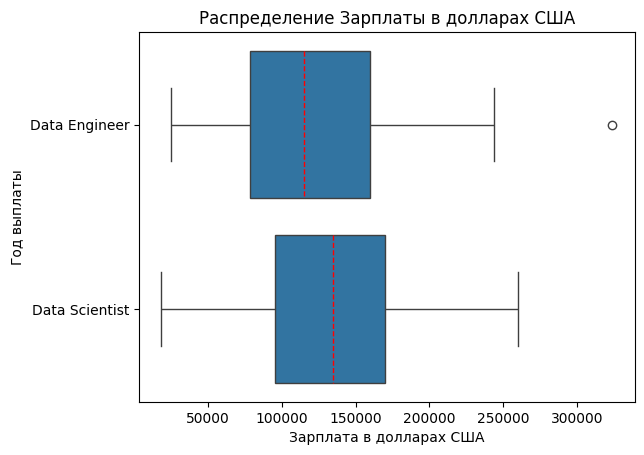

In [167]:
df_vis = df[(df.work_year == 2022) & ((df.job_title == 'Data Scientist') | (df.job_title == 'Data Engineer'))]
ax = sns.boxplot(df_vis, x='salary_in_usd', y='job_title', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Зарплата в долларах США', ylabel='Год выплаты')
plt.title('Распределение Зарплаты в долларах США')
plt.show()

##### **Вывод**

Анализ показал, заработные платы Data Scientist и Data Engineer в 2022 году не отличаются


#### Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?

**Проверка на нормальность**

Тест Шапиро-Уилка:

*Нулевая гипотеза для проверки на нормальность распределения* ($H_0$): распределение данные является нормальным.

*Альтернативная гипотеза для проверки на нормальность распределения* ($H_1$): распределение данных отлично от нормального.

In [168]:
# Формирование данных
df_s = df[(df.company_size == 'S') & (df.job_title == 'Data Scientist')]
df_m = df[(df.company_size == 'M') & (df.job_title == 'Data Scientist')]
df_l = df[(df.company_size == 'L') & (df.job_title == 'Data Scientist')]
# тест Шапиро-Уилка
print('Результат теста для небольших компаний:')
result = stats.shapiro(df_s.salary_in_usd.values)
decision_normality(result[1])
print()
print('Результат теста для средних компаний:')
result = stats.shapiro(df_m.salary_in_usd.values)
decision_normality(result[1])
print()
print('Результат теста для крупных компаний:')
result = stats.shapiro(df_l.salary_in_usd.values)
decision_normality(result[1])


Результат теста для небольших компаний:
p-value = 0.189
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным

Результат теста для средних компаний:
p-value = 0.897
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным

Результат теста для крупных компаний:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


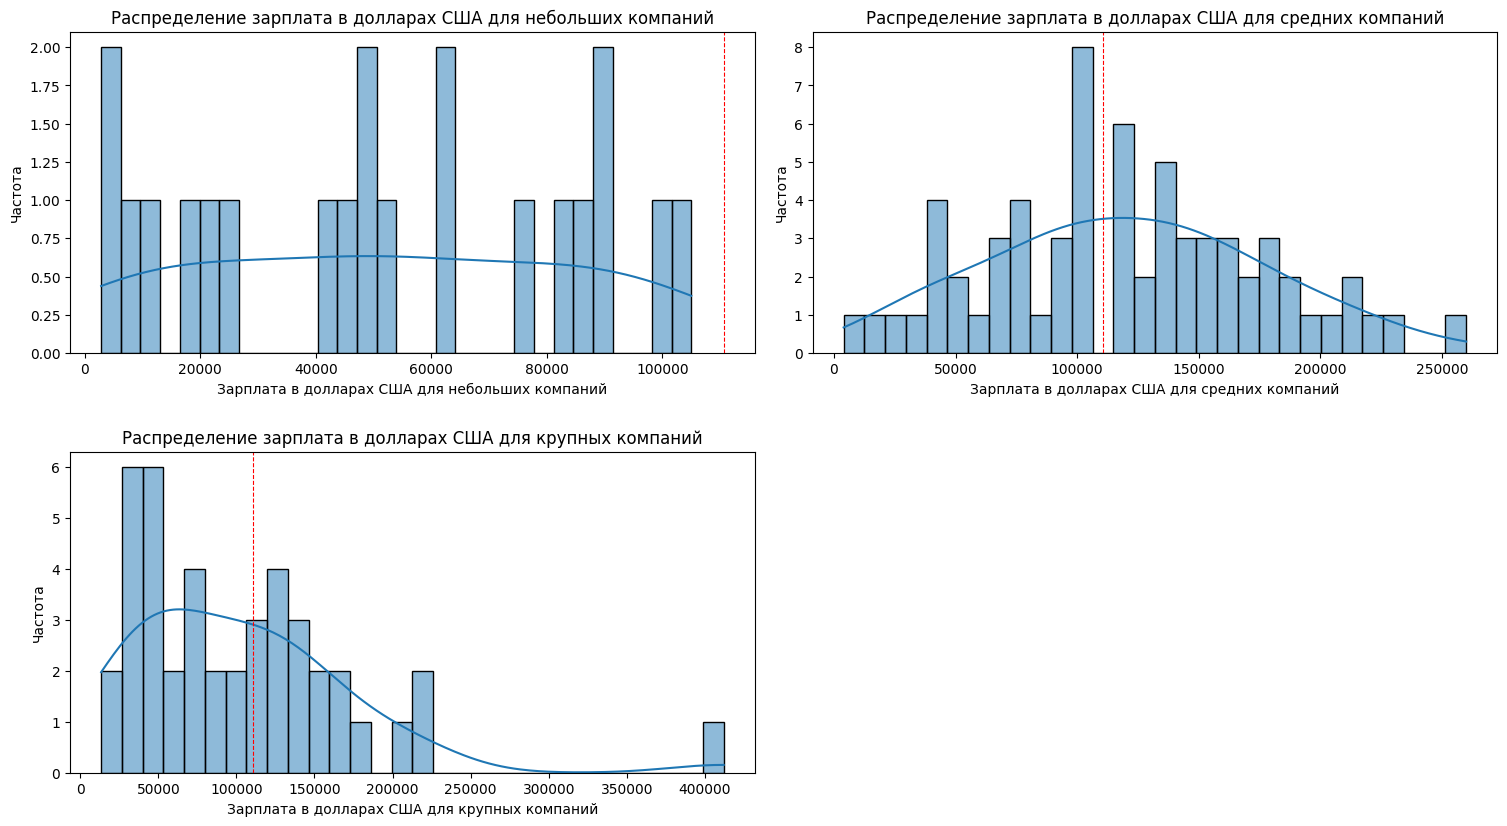

In [169]:
fig, axes = plt.subplots(2, 2, figsize=(15, 8))
fig.tight_layout(h_pad=5)
sns.histplot(df_s.salary_in_usd, bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set(xlabel='Зарплата в долларах США для небольших компаний', ylabel='Частота')
axes[0, 0].set_title('Распределение зарплата в долларах США для небольших компаний')
axes[0, 0].axvline(df_copy.salary_in_usd.mean(), color='red', linestyle='--', linewidth=0.8)

sns.histplot(df_m.salary_in_usd, bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set(xlabel='Зарплата в долларах США для средних компаний', ylabel='Частота')
axes[0, 1].set_title('Распределение зарплата в долларах США для средних компаний')
axes[0, 1].axvline(df_copy.salary_in_usd.mean(), color='red', linestyle='--', linewidth=0.8)

sns.histplot(df_l.salary_in_usd, bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set(xlabel='Зарплата в долларах США для крупных компаний', ylabel='Частота')
axes[1, 0].set_title('Распределение зарплата в долларах США для крупных компаний')
axes[1, 0].axvline(df_copy.salary_in_usd.mean(), color='red', linestyle='--', linewidth=0.8)

axes[1,1].set_axis_off()
plt.show()

Имеем три независимые группы с количественным признаком две из которых соответствуют нормальному распределению, одна - нет. Пограничный случай, целесообразно использование теста Краскела-Уоллеса.

**Нулевая и альтернативная гипотезы**

*Нулевая гипотеза*:  зарплаты специалистов Data Scientist в компаниях различных размеров одинаковы.


*Альтернативная гипотеза*: зарплаты специалистов Data Scientist в компаниях различных размеров отличаются.


In [170]:

# тест
_, p = stats.kruskal(df_s.salary_in_usd, df_m.salary_in_usd, df_l.salary_in_usd)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))


p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


##### **Вывод**

Анализ показал, что зарплаты специалистов Data Scientist в компаниях различных размеров отличаются


#### Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

In [171]:
# фильтрация job_title для выделения значений Data Scientist и Data Engineer
df_comp = df[(df.job_title == 'Data Scientist') | (df.job_title == 'Data Engineer')]
# df_comp = df_comp.groupby(by='company_size')
df_comp.company_size.value_counts()
# объединение Data Scientist и Data Engineer в общее наименование
df_comp.job_title = 'data'

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза*: между наличием должностей Data Scientist и Data Engineer и размером компании нет взаимосвязи (признаки независимы).

*Альтернативная гипотеза*: между наличием должностей Data Scientist и Data Engineer и размером компании есть взаимосвязь (признаки зависимы).

Признак company_size является категориальным, две сравниваемых группы, проверяется независимость двух признаков: job_title и company_size.

Для проверки гипотеры используем Критерий хи-квадрат.

In [172]:
# таблица сопряжённости
cross_table = pd.crosstab(df_comp.job_title, df_comp.company_size)

cross_table

company_size,L,M,S
job_title,,,
data,77,147,27


In [173]:
# тест
_, p, _, _ = stats.chi2_contingency(cross_table)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 1.000
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


##### **Вывод**

Анализ показал, что между наличием должностей Data Scientist и Data Engineer и размером компании нет взаимосвязи (признаки независимы).


## Ответы на поставленные бизнес-вопросы

* Как визуальный, так и статистический анализ показывают, что наблюдается ежегодный рост зарплат у специалистов Data Scientist

* Статистический анализ показывает, что заработные платы Data Scientist и Data Engineer в 2022 году практически не отличаются

* Как визуальный, так и статистический анализ показывают, что зарплаты специалистов Data Scientist в компаниях различных размеров отличаются

* Между наличием должностей Data Scientist и Data Engineer и размером компании взаимосвязь отсутствует

Вышеуказанные выводы сделаны с допущением на ошибку в размере 5%

## Дополнительное исследование

Визуальный анализ средней заработной платы в зависимости от размера компании показал, что для крупных и средних компаний заработная плата отличается незначительно. Дополнительный статистический тест, возможно, позволил бы внести большуя ясность в этот вопрос.

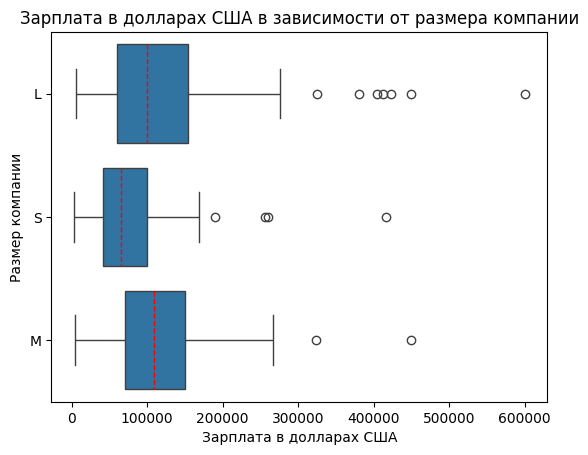

In [174]:
df_size = df.groupby(by='company_size', as_index=False).salary_in_usd.mean().sort_values(by='salary_in_usd', ascending=False)
df_size.nlargest(10, columns='salary_in_usd')

fig = px.bar(data_frame=df_size, x='company_size', y='salary_in_usd', color='company_size', text = df_size.salary_in_usd, orientation='v', 
    height=500, width=500, title='Средняя заработная плата в зависимости от размера компании' 
)
fig.show()

ax = sns.boxplot(df, x='salary_in_usd', y='company_size', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Зарплата в долларах США', ylabel='Размер компании')
plt.title('Зарплата в долларах США в зависимости от размера компании')
plt.show()

#### Формулировка вопроса

Различается ли размер зарплат для специалистов Data Scientist в крупных и средних компаниях?

**Нулевая и альтернативная гипотезы**

*Нулевая гипотеза*: Заработная плата одинакова.

*Альтернативная гипотеза*: Заработная плата отличается.

In [175]:
# Формирование данных
df_M = df[df.company_size == 'M']
df_L = df[df.company_size == 'L']

# тест Шапиро-Уилка
print('Результат теста для средних компаний:')
result = stats.shapiro(df_M.salary_in_usd.values)
decision_normality(result[1])
print()
print('Результат теста для крупных компаний:')
result = stats.shapiro(df_L.salary_in_usd.values)
decision_normality(result[1])


Результат теста для средних компаний:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального

Результат теста для крупных компаний:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


Имеем две независимые группы с количественным признаком с рапределением, отличным от нормального. Целесообразно использование теста Краскела-Уоллеса.

In [176]:
# тест
_, p = stats.kruskal(df_M.salary_in_usd, df_L.salary_in_usd)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))


p-value = 0.317
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


##### Вывод

Заработная плата Data Scientist в крупных и средних компаниях одинакова.